<a href="https://colab.research.google.com/github/ispineda/Courses/blob/main/Machine-Learning/Uso_b%C3%A1sico_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso básico Pandas

In [1]:
import pandas as pd

In [2]:
# Series
serie1 = pd.Series(data=[100, "Ninguno", 300, "Texto"], index=['Pablo', 'Juan', 'pedro','Ismael'])
serie1

Pablo         100
Juan      Ninguno
pedro         300
Ismael      Texto
dtype: object

In [3]:
# Acceso mediante llaves
print(serie1.loc[['Pablo', 'Juan']])
print('-----------------------')
# Acceso mediante indices
print(serie1[[0, 1]])
print(serie1.iloc[[0,1]])

Pablo        100
Juan     Ninguno
dtype: object
-----------------------
Pablo        100
Juan     Ninguno
dtype: object
Pablo        100
Juan     Ninguno
dtype: object


In [4]:
# Manipulación de datos en Series
print("Pablo" in serie1)
print(serie1 * 3)

True
Pablo                       300
Juan      NingunoNingunoNinguno
pedro                       900
Ismael          TextoTextoTexto
dtype: object


In [5]:
value = "Juan" in serie1
print(type(value))

print("Juan" in serie1 is False)

<class 'bool'>
False


In [6]:
# Creación  de un dataframe con una lista

data = [{'pablo':1, 'juan':2}, {'pedro':5,'julia':10, 'maria':20}]
data

[{'juan': 2, 'pablo': 1}, {'julia': 10, 'maria': 20, 'pedro': 5}]

In [7]:
pd.DataFrame(data)

,pablo,juan,pedro,julia,maria
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [8]:
df_emtech = pd.read_csv("https://raw.githubusercontent.com/emtechinstitute/data-science-proyecto2/master/synergy_logistics_database.csv")
df_emtech.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [9]:
df_emtech.describe()
df_emtech.dtypes

register_id        int64
direction         object
origin            object
destination       object
year               int64
date              object
product           object
transport_mode    object
company_name      object
total_value        int64
dtype: object

In [10]:
filter1 = df_emtech['year'] > 2018
alter_df_emtech_filter = df_emtech[filter1]
alter_df_emtech_filter

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
608,609,Exports,China,Japan,2019,02/02/19,Smartphones,Sea,Huawei Technologies Co,19000000
609,610,Exports,China,Japan,2019,03/02/19,Smartphones,Sea,Huawei Technologies Co,24000000
610,611,Exports,China,Japan,2019,04/02/19,Smartphones,Sea,Huawei Technologies Co,53000000
611,612,Exports,China,Japan,2019,05/02/19,Smartphones,Sea,Huawei Technologies Co,43000000
612,613,Exports,China,Japan,2019,06/02/19,Smartphones,Sea,Huawei Technologies Co,73000000
...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000


In [11]:
df_emtech.isnull().any()

register_id       False
direction         False
origin            False
destination       False
year              False
date              False
product           False
transport_mode    False
company_name      False
total_value       False
dtype: bool

In [12]:
# Si se tienen valores nulos
print("Cantidad total de datos: ",df_emtech.shape[0]) # Conteo de filas

print("La cantidad de datos eliminados son: ",df_emtech.shape[0] - df_emtech.dropna().shape[0]) # Número de datos castigados

Cantidad total de datos:  19056
La cantidad de datos eliminados son:  0


In [13]:
df_emtech.isnull().any()

register_id       False
direction         False
origin            False
destination       False
year              False
date              False
product           False
transport_mode    False
company_name      False
total_value       False
dtype: bool

In [14]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-dark-palette")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78d9dbac50>]],
      dtype=object)

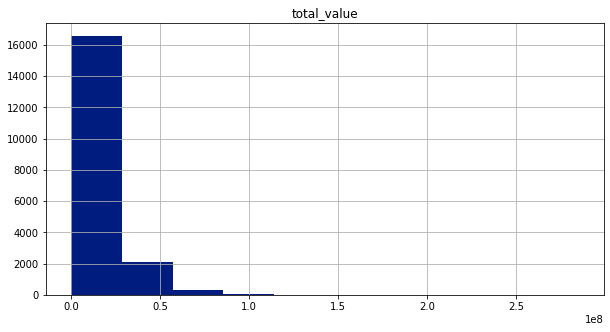

In [15]:
# Muestra la distribución de datos según los intervalos
df_emtech.hist(bins=10,column='total_value', figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78d1ef3d90>]],
      dtype=object)

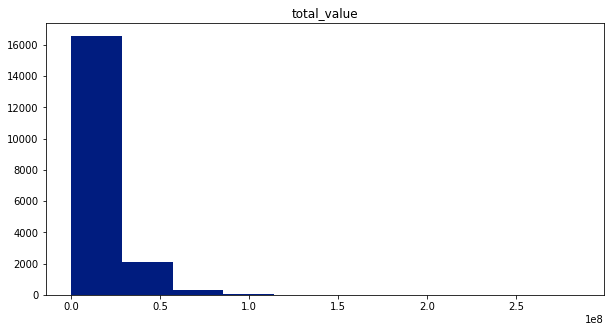

In [16]:
# Muestra la probabilidad de aparición de un dato 
df_emtech.hist(bins=10, column='total_value', figsize=(10,5), grid=False)

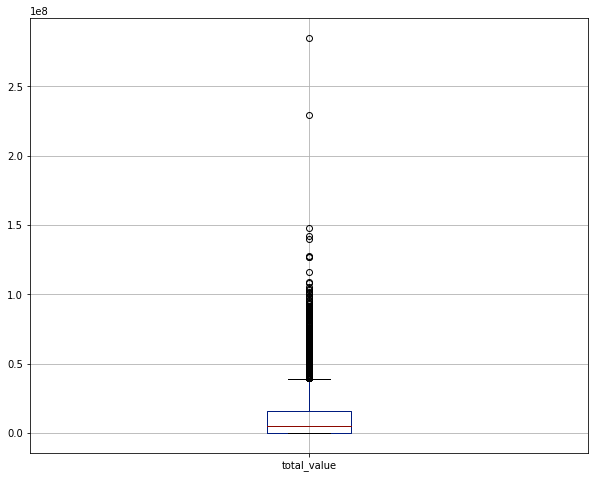

In [20]:
df_emtech.boxplot(column="total_value", figsize=(10,8),)

In [21]:
df_emtech['Route'] = df_emtech['origin'] + " - " + df_emtech['destination']
df_emtech.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,Route
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000,Japan - China
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000,Japan - China
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000,Japan - China
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000,Japan - China
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000,Japan - China


In [22]:
df_emtech.count()

register_id       19056
direction         19056
origin            19056
destination       19056
year              19056
date              19056
product           19056
transport_mode    19056
company_name      19056
total_value       19056
Route             19056
dtype: int64

In [34]:
print(df_emtech['Route'].value_counts())
df_emtech.groupby(by = ['Route','direction']).count()

South Korea - Vietnam    497
Netherlands - Belgium    437
USA - Netherlands        436
Japan - Mexico           385
China - Mexico           351
                        ... 
France - Russia           13
Japan - India              8
France - Austria           7
Brazil - Germany           6
Malaysia - Singapore       4
Name: Route, Length: 172, dtype: int64


,,register_id,origin,destination,year,date,product,transport_mode,company_name,total_value
Route,direction,,,,,,,,,
Australia - Brazil,Exports,112,112,112,112,112,112,112,112,112
Australia - Japan,Imports,102,102,102,102,102,102,102,102,102
Australia - Mexico,Exports,51,51,51,51,51,51,51,51,51
Australia - Philippines,Exports,114,114,114,114,114,114,114,114,114
Australia - Singapore,Exports,273,273,273,273,273,273,273,273,273
...,...,...,...,...,...,...,...,...,...,...
United Kingdom - Ireland,Exports,137,137,137,137,137,137,137,137,137
United Kingdom - Italy,Exports,100,100,100,100,100,100,100,100,100
United Kingdom - Spain,Exports,176,176,176,176,176,176,176,176,176


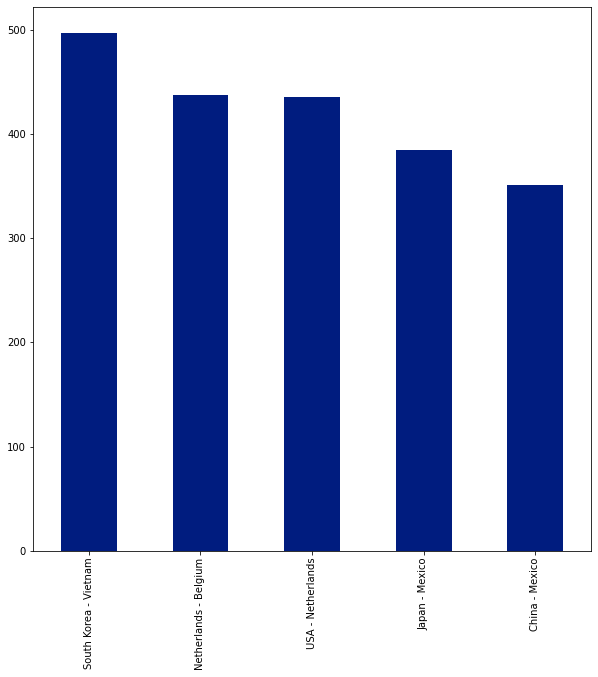

In [32]:
distribution_route = df_emtech['Route'].value_counts().head()
distribution_route.plot(kind="bar", figsize=(10,10))

In [ ]:
# Expresiones regulares https://regex101.com/

In [51]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use("seaborn-dark")

In [36]:
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Indicators.csv')

In [39]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [49]:
filtro = df['CountryName'] == "Mexico"
df_mexico = df[filtro]
df_mexico.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15224,Mexico,MEX,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.164508e+02
15225,Mexico,MEX,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,9.721359e+01
15226,Mexico,MEX,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.633732e+00
15227,Mexico,MEX,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,9.057986e+01
15228,Mexico,MEX,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,9.000000e+06
15229,Mexico,MEX,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.552900e+01
15230,Mexico,MEX,Changes in inventories (constant LCU),NE.GDI.STKB.KN,1960,1.128615e+11
15231,Mexico,MEX,Changes in inventories (current LCU),NE.GDI.STKB.CN,1960,2.609801e+06
15232,Mexico,MEX,Changes in inventories (current US$),NE.GDI.STKB.CD,1960,2.087841e+08
15233,Mexico,MEX,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,4.946562e-01


In [48]:
# Años de información

years_mexico = df_mexico['Year'].unique().tolist()
print(len(years_mexico))

print(min(years_mexico))
print(max(years_mexico))
print(max(years_mexico) - min(years_mexico))

56
1960
2015
55


In [61]:
his_indicator = "CO2 emissions (metric"
filtro2 = df_mexico['IndicatorName'].str.contains(his_indicator, regex=False)
df_CO2_emissiones_mexico = df_mexico[filtro2]
df_CO2_emissiones_mexico

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15235,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.653382
40674,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.657750
68468,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.569744
97033,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.582305
125944,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,1.716861
156997,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,1.686278
188629,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,1.758944
220929,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.899699
253505,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,1.922314
286365,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,2.028579


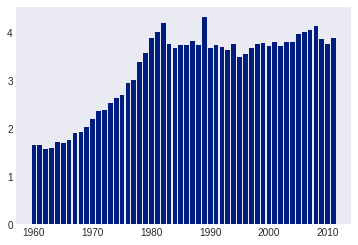

In [62]:
plt.bar(df_CO2_emissiones_mexico['Year'], df_CO2_emissiones_mexico['Value'])
plt.show()

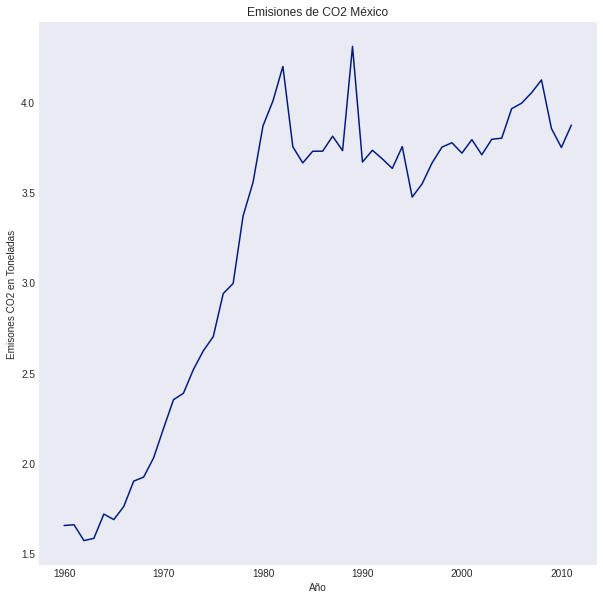

In [65]:
plt.figure(figsize=(10,10))
plt.plot(df_CO2_emissiones_mexico['Year'], df_CO2_emissiones_mexico['Value'])
plt.xlabel('Año')
plt.ylabel('Emisones CO2 en Toneladas')
plt.title('Emisiones de CO2 México')
plt.show()

In [69]:
hist_indicator = "CO2 emissions (metric"
hist_year = 2008 

mask1 = df['IndicatorName'].str.contains(his_indicator, regex= False)
mask2 = df['Year'].isin([hist_year])

co2_2008 = df[mask1 & mask2]
co2_2008.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4480667,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,4.373573
4481208,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,9.971533
4481740,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,7.152044
4482357,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,4.917487
4482952,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,4.252016


In [88]:
mex_assigned_co2 = float(co2_2008[co2_2008['CountryCode'] == 'MEX']['Value'])

48.60161977073529

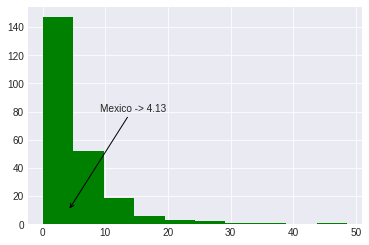

In [97]:
fig, ax = plt.subplots()

ax.annotate("Mexico -> " + str(round(mex_assigned_co2, 2)), 
            xy=(mex_assigned_co2,10), xycoords = "data", 
            xytext=(mex_assigned_co2+5,80), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.hist(co2_2008['Value'], 10, facecolor='green')
plt.grid(True)
plt.show()